Import the library

In [1]:
import pyvinecopulib as pv
import numpy as np

In [2]:
# Specify pair-copulas
bicop = pv.Bicop(pv.BicopFamily.bb1, 90, [3, 2])
pcs = [[bicop, bicop], [bicop]]

# Specify R-vine matrix
mat = np.array([[1, 1, 1], 
                [2, 2, 0], 
                [3, 0, 0]])

# Set-up a vine copula
cop = pv.Vinecop(mat, pcs)
print(cop)

<pyvinecopulib.Vinecop>
** Tree: 0
3,1 <-> BB1 90°, parameters = 3
2
2,1 <-> BB1 90°, parameters = 3
2
** Tree: 1
3,2 | 1 <-> BB1 90°, parameters = 3
2



Showcase some methods

In [3]:
u = cop.simulate(n=10, seeds=[1, 2, 3])
fcts = [cop.pdf, cop.rosenblatt, cop.inverse_rosenblatt,
        cop.loglik, cop.aic, cop.bic]
[f(u) for f in fcts]

[array([ 44.67583001,  54.34974545,  29.84989695,  19.18643731,
        199.72159236, 944.18332674,  21.78049474,  43.78532554,
          9.10911159,  13.39339764]),
 array([[0.1638618 , 0.8170847 , 0.12668051],
        [0.90118677, 0.11345478, 0.2222099 ],
        [0.62193432, 0.12286857, 0.39604429],
        [0.6902412 , 0.78638305, 0.37455509],
        [0.13685699, 0.10872534, 0.2777274 ],
        [0.03952828, 0.35645124, 0.06597532],
        [0.48023317, 0.77472657, 0.72886036],
        [0.19787956, 0.90877192, 0.60171   ],
        [0.85523898, 0.76413881, 0.04961411],
        [0.17627362, 0.77807695, 0.03875948]]),
 array([[0.1638618 , 0.8728502 , 0.79397093],
        [0.90118677, 0.03148971, 0.30865931],
        [0.62193432, 0.28213894, 0.46366853],
        [0.6902412 , 0.28590505, 0.30879851],
        [0.13685699, 0.88594611, 0.84611164],
        [0.03952828, 0.97430917, 0.95100319],
        [0.48023317, 0.53494551, 0.47865733],
        [0.19787956, 0.84458738, 0.75111263],
    

Create a vine copula model

Different ways to fit a copula (when the families and structure are known)...

In [4]:
u = cop.simulate(n=1000, seeds=[1, 2, 3])

# Define first an object to control the fits:
#    - pv.FitControlsVinecop objects store the controls
#    - here, we only restrict the parametric family
#    - see help(pv.FitControlsVinecop) for more details
controls = pv.FitControlsVinecop(family_set=[pv.BicopFamily.bb1])
print(controls)

# Create a new object an select family and parameters by fitting to data
cop2 = pv.Vinecop(mat, pcs)
cop2.select(data=u, controls=controls)
print(cop2)

# Otherwise, create directly from data
cop2 = pv.Vinecop(data=u, matrix=mat, controls=controls)
print(cop2)

<pyvinecopulib.FitControlsVinecop>
Family set: BB1
Parametric method: mle
Nonparametric method: quadratic
Nonparametric multiplier: 1
Weights: no
Selection criterion: bic
Preselect families: yes
mBIC prior probability: 0.9
Truncation level: none (default)
Tree criterion: tau
Threshold: 0
Select truncation level: no
Select threshold: no
Show trace: no
Number of threads: 1

<pyvinecopulib.Vinecop>
** Tree: 0
3,1 <-> BB1 90°, parameters = 2.92727
2.02245
2,1 <-> BB1 90°, parameters = 2.98212
2.04269
** Tree: 1
3,2 | 1 <-> BB1 90°, parameters = 2.72952
2.04218

<pyvinecopulib.Vinecop>
** Tree: 0
3,1 <-> BB1 90°, parameters = 2.92727
2.02245
2,1 <-> BB1 90°, parameters = 2.98212
2.04269
** Tree: 1
3,2 | 1 <-> BB1 90°, parameters = 2.72952
2.04218



When nothing is known, there are also two ways to fit a copula...

In [5]:
# Create a new object and select strucutre, family, and parameters
cop3 = pv.Vinecop(d=3)
cop3.select(data=u)
print(cop3)

# Otherwise, create directly from data
cop3 = pv.Vinecop(data=u)
print(cop3)

<pyvinecopulib.Vinecop>
** Tree: 0
2,1 <-> BB1 90°, parameters = 2.98212
2.04269
1,3 <-> BB6 90°, parameters = 1.54273
3.96417
** Tree: 1
2,3 | 1 <-> BB7 90°, parameters = 5.25545
 2.3454

<pyvinecopulib.Vinecop>
** Tree: 0
2,1 <-> BB1 90°, parameters = 2.98212
2.04269
1,3 <-> BB6 90°, parameters = 1.54273
3.96417
** Tree: 1
2,3 | 1 <-> BB7 90°, parameters = 5.25545
 2.3454



In [6]:
# create a C-vine structure with root node 1 in first tree, 2 in second, ...
cvine = pv.CVineStructure([4, 3, 2, 1]) 
# specify pair-copulas in every tree
tree1 = [pv.Bicop(pv.BicopFamily.gaussian, 0, [0.5]), 
         pv.Bicop(pv.BicopFamily.clayton, 0, [3]),
         pv.Bicop(pv.BicopFamily.student, 0, [0.4, 4])]
tree2 = [pv.Bicop(pv.BicopFamily.indep), 
         pv.Bicop(pv.BicopFamily.gaussian, 0, [0.5])]
tree3 = [pv.Bicop(pv.BicopFamily.gaussian)]

# instantiate C-vine copula model
cop = pv.Vinecop(cvine, [tree1, tree2, tree3])
u1 = cop.simulate(n=1000, seeds=[1, 2, 3])
print(cop)

<pyvinecopulib.Vinecop>
** Tree: 0
4,1 <-> Gaussian, parameters = 0.5
3,1 <-> Clayton, parameters = 3
2,1 <-> Student, parameters = 0.4
  4
** Tree: 1
4,2 | 1 <-> Independence
3,2 | 1 <-> Gaussian, parameters = 0.5
** Tree: 2
4,3 | 2,1 <-> Gaussian, parameters = 0



# My testing

In [7]:
u[:10]

array([[0.1638618 , 0.70626175, 0.90039145],
       [0.90118677, 0.14910265, 0.09861981],
       [0.62193432, 0.30831326, 0.46931803],
       [0.6902412 , 0.274291  , 0.35372345],
       [0.13685699, 0.85611936, 0.8537963 ],
       [0.03952828, 0.95766484, 0.95800357],
       [0.48023317, 0.36773659, 0.63136997],
       [0.19787956, 0.83474121, 0.76053974],
       [0.85523898, 0.16315493, 0.15700527],
       [0.17627362, 0.76174678, 0.86600893]])

In [8]:
cvine = pv.CVineStructure([3, 2, 1]) 

cop4 = pv.Vinecop(data=u, structure=cvine)
print(cop4.str())

** Tree: 0
3,1 <-> BB6 270°, parameters = 1.54273
3.96417
2,1 <-> BB1 90°, parameters = 2.98212
2.04269
** Tree: 1
3,2 | 1 <-> BB7 270°, parameters = 5.25545
 2.3454



In [9]:
cop4.pair_copulas

[[<pyvinecopulib.Bicop>
  BB6 270°, parameters = 1.54273
  3.96417,
  <pyvinecopulib.Bicop>
  BB1 90°, parameters = 2.98212
  2.04269],
 [<pyvinecopulib.Bicop>
  BB7 270°, parameters = 5.25545
   2.3454]]

In [10]:
# Sucessfully got the bottom level copula
bicop3 = cop4.pair_copulas[-1][0]

In [11]:
bicop3.aic()

-2807.784578359101

need to get the conditional distributions of the upper copulas to form the input for the lower

In [12]:
# get the two bicops in the 0th tree
bicop1, bicop2 = cop4.pair_copulas[0][0], cop4.pair_copulas[0][1]

In [13]:
# assuming that the columns correspond to the structure


# columns are : 3, 2, 1
u[:10]

array([[0.1638618 , 0.70626175, 0.90039145],
       [0.90118677, 0.14910265, 0.09861981],
       [0.62193432, 0.30831326, 0.46931803],
       [0.6902412 , 0.274291  , 0.35372345],
       [0.13685699, 0.85611936, 0.8537963 ],
       [0.03952828, 0.95766484, 0.95800357],
       [0.48023317, 0.36773659, 0.63136997],
       [0.19787956, 0.83474121, 0.76053974],
       [0.85523898, 0.16315493, 0.15700527],
       [0.17627362, 0.76174678, 0.86600893]])

In [14]:
# Column name 3
c3 = u.T[0].T
c2 = u.T[1].T
c1 = u.T[2].T
c3[0], c2[0], c1[0]

(0.16386179542130458, 0.7062617548799608, 0.9003914492495824)

bicop1:
3,1 <-> BB6 270°, parameters = 1.54273
3.96417

takes in 3, 1

try and see if fitting 3, 1 to an unbound copula gives the same result

In [15]:
# getting 3, 1
three_one = np.array([c3, c1]).T

In [16]:
bicop1

<pyvinecopulib.Bicop>
BB6 270°, parameters = 1.54273
3.96417

In [17]:
cop6 = pv.Bicop(data=three_one)
bicop1, cop6

(<pyvinecopulib.Bicop>
 BB6 270°, parameters = 1.54273
 3.96417,
 <pyvinecopulib.Bicop>
 BB6 90°, parameters = 1.54273
 3.96417)

The same thing!

get the hfunction for the first copula

In [18]:
h1 = cop6.hfunc1(u = three_one)
h1[:10]

array([0.96366968, 0.40500159, 0.78948128, 0.64018201, 0.45784887,
       0.47185066, 0.8791551 , 0.27981398, 0.48865576, 0.86985676])

2,1 <-> BB1 90°, parameters = 2.98212
2.04269

second function:

In [19]:
one_two = np.array([c2, c3]).T
bicop2, pv.Bicop(one_two)

(<pyvinecopulib.Bicop>
 BB1 90°, parameters = 2.98212
 2.04269,
 <pyvinecopulib.Bicop>
 BB1 90°, parameters = 2.98212
 2.04269)

In [20]:
bicop2 = cop4.get_pair_copula(tree=0, edge=1)
bicop2

<pyvinecopulib.Bicop>
BB1 90°, parameters = 2.98212
2.04269

In [21]:
# assuming that the columns are opposite to the structure

# columns are : 1, 2, 3

c1 = u.T[0].T
c2 = u.T[1].T
c3 = u.T[2].T

# Assuming one is the centre
three_one = np.array([c3, c1]).T
two_one = np.array([c2, c1]).T

# Get the two bicops
# bicop 1 is 3, 1 
# bicop 2 is 2, 1
bicop1, bicop2 = cop4.pair_copulas[0][0], cop4.pair_copulas[0][1]

# bicop1, pv.Bicop(three_one)


print(f"Does bicop 1 (tree 0 edge 0) match data 3, 1: {bicop1.aic() == pv.Bicop(three_one).aic()}")
print(f"Does bicop 2 (tree 0 edge 1) match data 2, 1: {bicop2.aic() == pv.Bicop(two_one).aic()}")

Does bicop 1 (tree 0 edge 0) match data 3, 1: True
Does bicop 2 (tree 0 edge 1) match data 2, 1: True


In [22]:
print(cop4.str)

<bound method PyCapsule.str of <pyvinecopulib.Vinecop>
** Tree: 0
3,1 <-> BB6 270°, parameters = 1.54273
3.96417
2,1 <-> BB1 90°, parameters = 2.98212
2.04269
** Tree: 1
3,2 | 1 <-> BB7 270°, parameters = 5.25545
 2.3454
>


In [23]:
h1 = bicop1.hfunc2(u = three_one) # should be changed to be the real stock data for each
h2 = bicop2.hfunc2(u = two_one)

# assume that the data used is h1, h2
h = np.array([h1, h2]).T
# get the tree 1 bicop
bicop3 = cop4.pair_copulas[1][0]
# bicop3.aic() == pv.Bicop(h).aic()

In [24]:
h, h1[0]

(array([[0.96366968, 0.03082567],
        [0.40500158, 0.63460285],
        [0.78948128, 0.29119366],
        ...,
        [0.11731375, 0.91317656],
        [0.90769446, 0.08364188],
        [0.9829503 , 0.02165676]]),
 0.9636696786080494)

In [25]:
bicop3.hfunc2(h)[:10]


array([0.37378069, 0.59068134, 0.8732499 , 0.60757189, 0.36947242,
       0.33500097, 0.61863269, 0.63348215, 0.50892447, 0.76540824])

In [26]:
cop4.pair_copulas[1]

[<pyvinecopulib.Bicop>
 BB7 270°, parameters = 5.25545
  2.3454]

In [27]:
u = cop.simulate(n=1000, seeds=[1, 2, 3])

In [28]:
import pandas as pd
df = pd.DataFrame(u, columns=['1', '2', '3'])
df.head()

ValueError: Shape of passed values is (1000, 4), indices imply (1000, 3)

In [ ]:
def c_tree_distributions(tree, u):
    # u is the stock data
    """ Break up the tree into their h-functions (only for c vines)
    :tree: a list of the bivariate copulas in a tree
    :u: an n by d matrix of observations (columns are node names ascending order)
    :returns: n by d array of conditional probabilities
    """
    # central is the first column
    if len(u[0])-1 != len(tree):
        return "tree and dataset doesn't match"

    if len(u[0]) <= 1:
        return "not big enough"
    
    # central is the first column
    c1 = u.T[0].T

    #out = {}
    #out = []
    out = pd.DataFrame()

    for i in range(1, len(u[0]), 1): # goes down so it matches the other data, columns are descending order
        # find each column
        #print('loop')
        ci = u.T[i].T
        copi = tree[i-1]

        # get the ith column and the first one in one array

        
        i_one = np.array([ci, c1]).T

        # calculate the conditional probabability for i given 1
        hi = copi.hfunc2(i_one)
        out[f'h{i-1}'] = hi
        #out.append(hi)
        
    #print(out[0][0], out[1][0])
    # return np.array(out).T
    return out

tree0 = cop4.pair_copulas[0]
tree0_distributions = c_tree_distributions(tree0, u)
tree0_distributions, h

(           h0        h1
 0    0.038688  0.972348
 1    0.652243  0.386573
 2    0.275575  0.782621
 3    0.365293  0.632777
 4    0.481498  0.448304
 ..        ...       ...
 995  0.822315  0.170628
 996  0.312937  0.607054
 997  0.928248  0.100438
 998  0.085878  0.892522
 999  0.035388  0.977070
 
 [1000 rows x 2 columns],
 array([[0.96366968, 0.03082567],
        [0.40500158, 0.63460285],
        [0.78948128, 0.29119366],
        ...,
        [0.11731375, 0.91317656],
        [0.90769446, 0.08364188],
        [0.9829503 , 0.02165676]]))

In [ ]:
tree1 = cop4.pair_copulas[1]
tree1_distributions = c_tree_distributions(tree1, np.array(tree0_distributions))
tree1_distributions[:10], bicop3.hfunc2(h)[:10]

(         h0
 0  0.879899
 1  0.579951
 2  0.814649
 3  0.558316
 4  0.365117
 5  0.338194
 6  0.492016
 7  0.573650
 8  0.506203
 9  0.901893,
 array([0.37378069, 0.59068134, 0.8732499 , 0.60757189, 0.36947242,
        0.33500097, 0.61863269, 0.63348215, 0.50892447, 0.76540824]))

In [ ]:
tree0_distributions

,h0,h1
0,0.038688,0.972348
1,0.652243,0.386573
2,0.275575,0.782621
3,0.365293,0.632777
4,0.481498,0.448304
...,...,...
995,0.822315,0.170628
996,0.312937,0.607054
997,0.928248,0.100438
998,0.085878,0.892522


In [ ]:
cvine2 = pv.CVineStructure([4, 3, 2, 1]) 

cop10 = pv.Vinecop(data=u1, structure=cvine2)
print(cop10.str())

** Tree: 0
4,1 <-> Gaussian, parameters = 0.513887
3,1 <-> Clayton, parameters = 3.04561
2,1 <-> Student, parameters = 0.414607
 4.11942
** Tree: 1
4,2 | 1 <-> Independence
3,2 | 1 <-> Gaussian, parameters = 0.458744
** Tree: 2
4,3 | 2,1 <-> Frank, parameters = -0.311616



In [ ]:
# get the distributions for the first tree (from the 0th tree)

tree0_dist = c_tree_distributions(tree=cop10.pair_copulas[0], u=u1)
tree0_dist.head()

,h0,h1,h2
0,0.051003,0.348098,0.154372
1,0.595289,0.603045,0.194209
2,0.287131,0.790391,0.516892
3,0.353683,0.495890,0.235785
4,0.517288,0.306026,0.244165


In [ ]:
bicop4 = cop10.pair_copulas[1][1]

h1_h0 = np.array([np.array(tree0_dist["h1"]), np.array(tree0_dist["h0"])]).T
pv.Bicop(h1_h0).aic(), bicop4.aic(h1_h0)

(-220.81892248456325, -218.06642328819123)

In [ ]:
u2 = np.array(tree0_dist)
tree1_dist = c_tree_distributions(tree=cop10.pair_copulas[1], u=u2)
tree1_dist

,h0,h1
0,0.348098,0.381596
1,0.603045,0.136723
2,0.790391,0.632206
3,0.495890,0.268814
4,0.306026,0.211204
...,...,...
995,0.602467,0.212444
996,0.198274,0.527562
997,0.707059,0.871144
998,0.080356,0.448583


In [ ]:
bicopfinal = cop10.pair_copulas[2][0]
h0_h1 = np.array([np.array(tree1_dist["h0"]), np.array(tree1_dist["h1"])]).T
bicopfinal, pv.Bicop(h0_h1)

(<pyvinecopulib.Bicop>
 Frank, parameters = -0.311616,
 <pyvinecopulib.Bicop>
 Gaussian, parameters = -0.184424)

write out slowly what h1 is in conditional terms

https://hudsonthames.org/copula-for-statistical-arbitrage-a-c-vine-copula-trading-strategy/

In [29]:
# assume columns, S1, S2, S3, S4
u1[:5]

array([[0.1638618 , 0.02834326, 0.15361975, 0.10164671],
       [0.90118677, 0.80756393, 0.85073425, 0.3794888 ],
       [0.62193432, 0.37359836, 0.82106409, 0.56510912],
       [0.6902412 , 0.4733412 , 0.68600531, 0.34314186],
       [0.13685699, 0.2996914 , 0.12138977, 0.1403756 ]])

In [30]:
structure = pv.CVineStructure(order=[1,2,3,4])
vinecop = pv.Vinecop(structure=structure, data=u1)
vinecop.str

<bound method PyCapsule.str of <pyvinecopulib.Vinecop>
** Tree: 0
1,4 <-> Gaussian, parameters = 0.513887
2,4 <-> TLL, parameters = [30x30 grid]
3,4 <-> BB8 180°, parameters =  1.97251
0.899361
** Tree: 1
1,3 | 4 <-> BB1, parameters = 2.08981
1.08063
2,3 | 4 <-> TLL, parameters = [30x30 grid]
** Tree: 2
1,2 | 3,4 <-> Student, parameters = -0.102774
  6.59947
>

In [31]:
S1 = u1.T[0].T
S2 = u1.T[1].T
S3 = u1.T[2].T
S4 = u1.T[3].T

In [32]:
cop0 = vinecop.pair_copulas[0][0]
cop1 = vinecop.pair_copulas[0][1]

compare cop0 with fitting a copula with s4 and s1 data to figure out the "direction"

In [33]:
print(cop0.aic() == pv.Bicop(data=np.array([S1, S4]).T).aic())
print(cop1.aic() == pv.Bicop(data=np.array([S2, S4]).T).aic())

True
True


therefore when the structure is 1,2,3,4

the inputs before transpositon are 1, 4, for 1,4 on the graph

lets try and map the data using the relationship  ```1,3 | 4``` for tree 1 edge 0

assume 3 | 4 is always from the last copula of the first tree


In [34]:
pv.Bicop(data=np.array([S2, cop]).T)

/var/folders/f5/9kn8mtyn7p1cdn40mw2mhtn80000gn/T/ipykernel_9314/947168374.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  pv.Bicop(data=np.array([S2, cop]).T)


TypeError: __init__(): incompatible constructor arguments. The following argument types are supported:
    1. pyvinecopulib.Bicop(family: pyvinecopulib.BicopFamily = <BicopFamily.indep: 0>, rotation: int = 0, parameters: numpy.ndarray[numpy.float64[m, n]] = array([], shape=(0, 0), dtype=float64), var_types: List[str] = ['c', 'c'])
    2. pyvinecopulib.Bicop(data: numpy.ndarray[numpy.float64[m, 2]], controls: pyvinecopulib.FitControlsBicop = FitControlsBicop(), var_types: List[str] = ['c', 'c'])
    3. pyvinecopulib.Bicop(filename: str)

Invoked with: kwargs: data=array([array([2.83432611e-02, 8.07563934e-01, 3.73598356e-01, 4.73341202e-01,
              2.99691405e-01, 1.63994318e-01, 1.73907322e-01, 6.61672535e-01,
              6.70852824e-01, 1.11140355e-01, 5.77724096e-01, 3.89811607e-02,
              3.99315884e-01, 2.55017448e-01, 9.87357638e-01, 5.55638777e-01,
              3.84448143e-01, 6.40550457e-01, 7.13106008e-01, 8.41025155e-01,
              6.65499708e-01, 1.60916739e-03, 4.43535646e-01, 9.02735401e-01,
              1.23299636e-01, 2.26386987e-01, 4.57851609e-01, 8.87794303e-01,
              1.77211201e-01, 2.80797628e-01, 5.91221315e-02, 9.50483947e-01,
              2.29802501e-01, 5.31096350e-01, 2.57729652e-01, 6.63662135e-01,
              3.61965524e-01, 8.44517567e-01, 8.67023585e-01, 7.16117296e-01,
              2.50489094e-01, 4.47780950e-01, 3.84589314e-01, 3.97222626e-01,
              6.87422074e-01, 7.62776053e-02, 4.77862648e-01, 4.00551982e-01,
              6.34685743e-01, 5.00038815e-01, 5.86804817e-01, 2.10637468e-01,
              1.69854932e-02, 6.01010636e-01, 4.64080376e-01, 9.91018724e-01,
              3.35048195e-02, 8.25746834e-01, 2.33729185e-01, 2.13530748e-01,
              6.87688649e-01, 5.24570778e-01, 3.93065509e-01, 4.81040308e-01,
              6.52293466e-01, 5.98678450e-01, 4.21700894e-01, 2.46348017e-01,
              9.57833351e-01, 8.92538172e-01, 1.28917994e-01, 1.57983787e-01,
              5.41264151e-01, 9.17070923e-01, 1.01042543e-02, 8.02370965e-01,
              6.93408297e-01, 8.21100899e-02, 2.54672674e-01, 6.71964854e-01,
              4.48578606e-01, 4.73814085e-01, 1.88020569e-02, 5.03262015e-01,
              4.75631224e-01, 7.43491153e-01, 8.95427062e-01, 7.31047671e-01,
              3.64495652e-01, 5.52070305e-01, 1.90228081e-01, 8.32029786e-02,
              4.23611904e-01, 5.41511773e-01, 5.92071341e-01, 1.62855072e-01,
              8.36422038e-01, 9.23733647e-01, 5.06811724e-01, 6.99752129e-01,
              4.07947175e-01, 4.22570388e-02, 5.00143005e-01, 9.36552955e-01,
              3.96727888e-01, 4.42953626e-01, 7.40815406e-01, 9.90559809e-01,
              7.03251974e-01, 9.42571067e-01, 7.70562129e-01, 7.93346580e-01,
              5.51975335e-01, 9.35194455e-01, 7.72893506e-01, 2.16760433e-01,
              2.92989367e-01, 6.92788030e-02, 2.96312345e-01, 3.15628953e-01,
              8.75070824e-01, 9.91011525e-01, 8.80423256e-01, 5.65389959e-01,
              3.51074161e-01, 1.55132222e-01, 9.92679109e-01, 7.09211693e-01,
              4.30984596e-01, 7.41626197e-01, 5.13338170e-01, 8.09844155e-02,
              7.08580224e-01, 4.97341416e-01, 2.13729825e-01, 6.89586177e-01,
              8.19151038e-01, 1.64516469e-02, 4.88061550e-01, 6.97065596e-01,
              1.66018966e-02, 7.97658742e-01, 1.02598654e-02, 5.39268328e-02,
              6.60571600e-01, 5.58470875e-02, 1.14020403e-01, 7.60540980e-01,
              8.40558698e-01, 2.23500914e-01, 6.34125007e-01, 6.66051805e-01,
              8.59342159e-01, 9.28239423e-01, 6.03098383e-01, 7.49974606e-01,
              5.19838149e-01, 6.19746162e-01, 7.04930064e-01, 2.66724544e-01,
              7.41345075e-01, 1.04005642e-01, 2.58102385e-01, 2.40319063e-01,
              8.62602818e-01, 5.85281860e-01, 7.28172216e-01, 5.43913506e-01,
              5.00099603e-01, 1.58727776e-01, 8.43531347e-01, 4.26297522e-03,
              9.43126309e-01, 4.76109736e-01, 4.78645536e-01, 9.21961722e-01,
              1.81374181e-01, 7.72329818e-01, 5.54237874e-01, 6.59275870e-01,
              8.07345799e-01, 8.21846466e-01, 1.84638674e-01, 3.56846208e-01,
              5.82072829e-01, 9.08115561e-01, 5.09843473e-01, 4.69470281e-01,
              2.58347962e-01, 2.18184330e-01, 7.78698112e-01, 8.31311696e-01,
              1.66835647e-01, 2.31845975e-01, 2.31094550e-01, 9.37173197e-01,
              1.62826561e-01, 2.00941466e-01, 3.32834622e-01, 2.92217877e-01,
              1.66708299e-01, 9.14088727e-01, 2.87413501e-01, 8.13907774e-01,
              8.96523727e-01, 2.12685640e-01, 2.12300710e-01, 3.36365101e-01,
              3.71719604e-01, 5.17765635e-01, 8.77182418e-01, 3.45931933e-01,
              7.23417465e-01, 8.88013033e-01, 7.19872993e-01, 5.22428437e-01,
              8.50445925e-01, 5.74518612e-01, 7.41659327e-01, 8.64296302e-01,
              9.39158248e-01, 1.57646748e-01, 2.88193874e-01, 1.62711572e-01,
              6.74150657e-01, 4.90009366e-01, 7.44368879e-01, 6.63966338e-01,
              2.38205778e-01, 6.72236347e-01, 9.93707155e-01, 3.91164501e-01,
              9.11812043e-01, 5.22222522e-01, 7.67522836e-02, 2.30927697e-01,
              1.65585334e-01, 1.01008683e-02, 6.07128942e-01, 8.37653139e-01,
              5.18074110e-01, 6.13436741e-02, 7.48908517e-01, 8.44587944e-01,
              3.72004928e-02, 3.24180211e-01, 2.23228375e-01, 6.90672368e-01,
              6.26740996e-01, 8.72038192e-01, 5.47102494e-05, 2.72645923e-02,
              1.78694573e-01, 6.34067133e-01, 9.45801637e-01, 4.84214281e-01,
              3.50091375e-01, 8.14044273e-03, 2.67261975e-01, 2.79359208e-01,
              3.52727761e-01, 1.86082005e-01, 5.99098115e-02, 9.91499283e-01,
              7.23031338e-02, 1.44365697e-01, 9.83033619e-01, 8.59704712e-01,
              2.43989904e-01, 2.79014047e-01, 2.32694491e-01, 4.28107127e-01,
              4.75267011e-01, 7.13151865e-01, 7.61695925e-01, 4.53411018e-01,
              5.57494587e-01, 8.56394790e-01, 5.46702872e-01, 8.08013085e-01,
              5.25276165e-01, 3.16787033e-01, 1.74982097e-01, 6.87589677e-01,
              8.22973526e-01, 4.93522539e-01, 3.13524289e-01, 3.57629597e-01,
              6.23182689e-01, 8.60756835e-01, 8.56358724e-01, 7.98786756e-01,
              4.44985486e-01, 5.81563465e-01, 6.61295671e-01, 3.31897187e-01,
              5.17666342e-01, 5.56816399e-01, 1.53381602e-01, 9.44037111e-01,
              7.55039031e-01, 6.82950500e-02, 3.92885464e-01, 5.70356741e-01,
              1.47105713e-01, 6.40461615e-01, 9.07546810e-01, 3.95748117e-01,
              7.08978590e-01, 7.66649551e-01, 8.03908586e-01, 2.95409481e-01,
              2.75453230e-01, 4.28545818e-02, 7.86852286e-01, 3.70903032e-01,
              6.67957002e-01, 6.92157842e-01, 2.40235685e-01, 3.49727324e-01,
              7.85687092e-01, 4.39920097e-01, 2.55141809e-01, 3.28274762e-01,
              7.79877743e-01, 5.86858529e-01, 1.49626934e-01, 8.53102200e-01,
              5.08537165e-01, 2.30903151e-01, 2.33882819e-01, 4.47937929e-01,
              3.29827036e-01, 3.26177605e-01, 8.05691880e-01, 6.23928747e-01,
              1.11935963e-02, 3.64911089e-01, 6.90582709e-01, 4.95798900e-01,
              3.22337983e-01, 6.41622978e-01, 8.11962227e-01, 4.54823225e-01,
              3.17244402e-01, 2.28110212e-01, 3.32974739e-01, 7.61891966e-01,
              4.27421293e-01, 4.50261989e-01, 1.10066014e-01, 4.12528822e-01,
              5.50832992e-02, 2.36841008e-01, 2.77976179e-01, 5.02613018e-01,
              4.30625418e-01, 8.72578478e-01, 2.75290111e-01, 3.25968280e-01,
              8.60489107e-01, 6.20110334e-01, 1.96606555e-02, 8.88611818e-01,
              7.66192362e-01, 7.28303762e-01, 1.53096042e-02, 7.96169578e-01,
              3.78956608e-01, 1.16357234e-01, 1.72708716e-03, 4.28434166e-01,
              6.49287345e-01, 5.94015493e-01, 1.37139550e-01, 3.37396393e-01,
              3.76797731e-01, 2.46531175e-01, 3.59217569e-01, 3.32431823e-01,
              2.35673225e-01, 1.81459682e-01, 6.32159936e-01, 7.10893143e-01,
              3.35377465e-01, 7.40958094e-01, 9.75114998e-01, 3.92634458e-02,
              7.56794813e-01, 5.63981373e-01, 9.57370198e-01, 5.54630589e-01,
              1.01666587e-01, 8.83714574e-01, 8.49326784e-01, 8.74323404e-01,
              3.42114545e-01, 1.38123258e-01, 9.76777039e-01, 7.84675202e-01,
              2.67681947e-01, 4.41508198e-01, 2.28298569e-01, 1.41911134e-01,
              5.15992340e-01, 6.18246193e-01, 3.03570605e-01, 7.16886712e-01,
              2.34638083e-01, 6.29633198e-01, 4.11325530e-02, 6.49935413e-01,
              9.08952682e-01, 3.79870674e-01, 7.19537953e-01, 6.30149459e-01,
              9.96934461e-01, 3.25932300e-01, 4.29409514e-01, 3.49443453e-01,
              4.96477430e-01, 6.38040642e-02, 8.63728248e-01, 2.03345607e-01,
              6.66124496e-01, 2.28536821e-03, 4.41753858e-01, 3.70602489e-01,
              8.31062348e-01, 5.18785816e-01, 8.08467177e-01, 7.22646795e-01,
              1.80256851e-01, 6.63708554e-01, 5.10854664e-01, 3.44948833e-01,
              7.48095948e-01, 3.48805902e-02, 7.56101709e-01, 4.93561341e-01,
              9.01580305e-01, 3.21674214e-01, 1.15428310e-01, 2.52575565e-01,
              8.56924364e-01, 8.50107924e-01, 1.46795173e-01, 5.80563739e-01,
              2.39469795e-01, 5.53252533e-01, 8.25317263e-01, 4.35487389e-01,
              2.51391963e-01, 4.88271811e-01, 2.10445994e-02, 2.98145236e-01,
              9.97142928e-01, 7.51129195e-01, 3.63316024e-01, 4.29524335e-01,
              5.19129237e-01, 5.22474526e-01, 7.47133273e-01, 5.34004567e-01,
              2.87101635e-01, 2.15860130e-01, 1.37419887e-02, 6.30811290e-01,
              5.59968634e-01, 8.77796865e-01, 2.54951433e-01, 6.54945616e-02,
              8.72965940e-01, 6.59737306e-01, 2.16938282e-01, 6.53888526e-01,
              5.74891999e-01, 3.33233895e-02, 2.05102520e-01, 2.83490419e-01,
              7.25903286e-01, 2.19234158e-01, 5.18481635e-01, 9.75152896e-01,
              8.87112441e-01, 3.31654240e-01, 4.87734370e-01, 3.64721439e-01,
              8.70377012e-01, 5.19183691e-02, 8.07755951e-01, 8.65743953e-01,
              7.96978530e-02, 7.78290474e-01, 7.77671609e-01, 5.13933979e-01,
              5.74242238e-01, 9.87465181e-01, 7.93410252e-02, 7.42202879e-02,
              1.81851182e-01, 1.80740874e-01, 2.73433150e-01, 4.31853906e-01,
              6.44668375e-01, 6.60301480e-02, 6.32466238e-01, 3.84588036e-01,
              7.80376236e-01, 4.80706489e-01, 3.33032984e-01, 7.85981723e-01,
              7.03296341e-01, 4.48238907e-01, 5.03119544e-01, 2.55377698e-01,
              5.52021131e-01, 4.98532501e-01, 8.86992974e-01, 5.34523504e-01,
              9.89104075e-01, 9.86317194e-01, 5.07567409e-01, 9.74375838e-02,
              1.47029819e-02, 3.51160689e-01, 8.01747092e-01, 3.68667647e-01,
              5.42131518e-01, 2.36866283e-01, 6.12339279e-01, 1.11711786e-01,
              8.75163735e-01, 2.77852950e-02, 4.66438755e-01, 9.84435429e-01,
              9.96669525e-01, 2.24672935e-01, 3.15788415e-01, 6.78465930e-01,
              9.59563146e-01, 7.18522862e-01, 7.91405128e-01, 5.30154314e-01,
              7.72281352e-02, 8.48412815e-01, 5.90104927e-01, 5.95687422e-01,
              4.16774588e-01, 4.04130099e-01, 2.91840817e-01, 7.31363995e-01,
              7.08398574e-01, 7.94765616e-01, 9.10653042e-01, 1.86329118e-01,
              2.60648138e-01, 5.37437018e-03, 2.50081158e-01, 9.91603356e-01,
              1.66859451e-01, 4.35421121e-01, 8.03111060e-01, 7.76748623e-01,
              4.62781621e-02, 4.83846537e-01, 5.94711151e-01, 5.07094866e-01,
              1.87060651e-01, 3.40762355e-02, 7.31068629e-01, 6.53454192e-01,
              7.87958132e-01, 3.27316468e-01, 6.23749456e-01, 9.39289966e-01,
              8.54169258e-01, 7.17181721e-01, 8.05159629e-01, 6.35150892e-01,
              9.07725436e-01, 7.33633613e-01, 5.85052969e-01, 1.04125905e-01,
              2.93668982e-01, 5.31512437e-02, 2.35658676e-01, 6.72421457e-01,
              6.10413710e-01, 9.37100280e-02, 7.40395119e-01, 4.57722868e-01,
              4.38796683e-01, 1.51185142e-01, 5.80332722e-01, 7.18135557e-01,
              3.44528301e-02, 9.65484719e-01, 3.36208263e-01, 7.45475839e-01,
              3.81228766e-01, 6.00986713e-01, 1.30587073e-01, 3.78950571e-01,
              6.81607419e-01, 9.80299649e-01, 6.56022024e-01, 8.64847009e-01,
              4.75463806e-01, 2.12647209e-02, 7.62431500e-01, 7.23636218e-01,
              7.53293327e-01, 2.22422705e-01, 6.86103086e-01, 4.09027709e-01,
              7.21432219e-01, 1.86693295e-01, 9.48797071e-01, 7.08652436e-01,
              4.02012987e-01, 6.48978345e-01, 2.31823024e-01, 8.32958843e-01,
              7.71721849e-01, 1.13099238e-01, 7.91662421e-01, 6.16493341e-01,
              3.13286662e-01, 2.91734935e-01, 7.85331773e-01, 2.39489240e-01,
              2.49282189e-01, 2.62427987e-01, 1.02434667e-01, 5.94658507e-01,
              9.13395424e-01, 3.29839314e-01, 8.16623676e-01, 6.78517670e-02,
              7.94714861e-01, 4.90557019e-01, 3.80126469e-01, 9.48026865e-01,
              4.62756204e-01, 3.48403579e-01, 3.44680033e-01, 2.06011002e-01,
              5.65068187e-01, 2.50303433e-01, 5.09143517e-01, 3.31773147e-01,
              4.79659997e-01, 8.02624328e-01, 4.88470402e-01, 8.93185014e-01,
              9.64463183e-01, 2.94033822e-01, 6.44717498e-01, 3.20372746e-01,
              5.70278782e-01, 7.77211710e-01, 5.82834485e-01, 2.18246727e-01,
              7.99975256e-01, 5.51587468e-01, 6.30428565e-01, 7.02069819e-01,
              8.32659239e-01, 5.88065088e-01, 6.39618634e-01, 9.44055359e-01,
              6.28995348e-01, 9.51879982e-01, 1.08628182e-01, 6.41020645e-01,
              6.67661401e-01, 6.32023910e-01, 5.87776561e-01, 9.38422491e-02,
              5.78209287e-01, 2.77090813e-01, 8.36164004e-01, 9.31178465e-01,
              2.38914428e-01, 4.35797381e-01, 5.96125745e-01, 8.96446171e-01,
              6.16528769e-01, 4.80959632e-01, 6.10362211e-01, 3.20068766e-01,
              9.91134955e-02, 3.74930417e-01, 8.24156402e-01, 8.59086992e-01,
              2.03006351e-01, 7.61886206e-01, 2.45726782e-01, 2.00207230e-01,
              5.61228930e-01, 7.92928405e-01, 4.64175603e-01, 8.96226317e-01,
              5.28923754e-02, 3.97685905e-01, 9.12124779e-01, 8.34556975e-01,
              5.10691981e-01, 7.91356188e-01, 3.51622657e-01, 6.25508935e-01,
              8.79816961e-02, 8.78140811e-01, 8.41582311e-01, 2.82977234e-01,
              2.12336420e-01, 4.27487201e-01, 3.33879802e-02, 9.15327672e-01,
              3.30391718e-01, 3.72509840e-01, 3.33031376e-01, 2.46062725e-01,
              4.68500384e-01, 4.91258375e-01, 3.42675317e-01, 8.67472563e-01,
              7.41786929e-01, 1.04115475e-01, 4.29516374e-01, 7.81880415e-01,
              9.15858612e-01, 1.83834763e-01, 8.66095844e-01, 4.63889747e-01,
              1.46306275e-01, 4.94546137e-01, 3.81167735e-01, 5.43413997e-01,
              5.87657787e-01, 7.35876088e-01, 1.32005650e-01, 1.30556663e-01,
              3.25705785e-02, 7.48798382e-01, 3.96099964e-01, 5.91181587e-01,
              9.93310529e-01, 3.82380220e-01, 3.52499886e-03, 1.78996138e-01,
              4.39794138e-01, 5.15073559e-01, 3.95596060e-01, 4.26101838e-01,
              8.20233351e-01, 9.80716447e-01, 2.78093352e-01, 7.81870553e-01,
              1.83735010e-01, 5.43810126e-01, 1.55157784e-01, 3.60658174e-01,
              6.14004221e-01, 2.66354998e-01, 4.74177220e-01, 7.70306160e-01,
              1.42165454e-01, 6.26915003e-01, 7.67558189e-01, 5.31156401e-01,
              1.84324574e-01, 8.08729265e-01, 3.54053510e-01, 4.24510547e-01,
              5.79191556e-02, 9.83924116e-01, 9.49330693e-01, 3.18444490e-02,
              2.56709241e-01, 9.09963737e-01, 5.11684317e-01, 7.69794007e-01,
              4.37440176e-02, 9.76432408e-01, 8.65327163e-01, 3.83615406e-01,
              2.72900493e-01, 3.41225039e-02, 7.70041353e-01, 2.69809850e-01,
              5.25498258e-01, 2.63812098e-01, 4.92397538e-01, 6.67941129e-01,
              5.87327955e-01, 2.08816002e-02, 4.64038911e-01, 6.59693968e-01,
              9.76860730e-01, 1.97241727e-01, 2.01787156e-01, 7.01567695e-01,
              1.43038203e-01, 8.48288754e-01, 8.05801925e-01, 3.84113852e-01,
              8.57824160e-01, 3.21511738e-01, 4.08839275e-01, 3.89222615e-01,
              3.70632791e-01, 4.17940458e-01, 8.59901157e-02, 5.89920497e-01,
              9.88846286e-01, 5.31072267e-01, 2.17798378e-01, 3.50659560e-02,
              3.52990394e-01, 5.11823985e-02, 7.27056443e-01, 6.66207445e-01,
              7.77404420e-01, 2.91806252e-01, 4.17718558e-01, 2.85241744e-01,
              3.04882712e-01, 8.85543746e-01, 6.59242799e-01, 2.13143816e-01,
              9.21657929e-01, 5.77600754e-01, 2.31913897e-01, 1.94667619e-01,
              4.63491797e-01, 3.54414194e-01, 7.14832523e-01, 5.87998712e-01,
              1.28156285e-01, 7.48179910e-01, 2.66196504e-01, 8.18796901e-01,
              5.71715115e-01, 5.20217218e-01, 8.17404533e-01, 6.45762217e-01,
              4.14980089e-01, 9.80922319e-01, 1.32509408e-02, 7.99069686e-01,
              9.23361212e-01, 2.53288797e-01, 4.18268053e-01, 9.24369811e-01,
              2.99107643e-01, 9.52433276e-01, 3.82865650e-01, 1.97439476e-01,
              3.29486367e-01, 6.11399542e-01, 1.94277123e-01, 7.06677444e-02,
              1.12629656e-01, 5.58399554e-01, 9.46561887e-01, 8.36125064e-02,
              8.56331585e-01, 3.56209601e-02, 7.47315327e-01, 7.74887591e-01,
              1.96605227e-01, 2.75834713e-01, 9.42914825e-01, 1.05068685e-04,
              7.98269630e-01, 1.15385079e-01, 5.66799349e-01, 2.93488795e-01,
              8.01432812e-03, 3.99429388e-02, 3.73702819e-01, 6.98713915e-01,
              6.45872951e-01, 5.34551075e-01, 7.54753231e-01, 5.98990569e-01,
              5.23309346e-01, 9.24878769e-02, 2.21786817e-01, 9.11389024e-01,
              2.04241732e-01, 1.50319202e-01, 4.81630180e-01, 9.69503465e-01,
              2.91814085e-01, 6.90641559e-02, 5.10581216e-01, 1.86954165e-01,
              8.01935765e-01, 9.76885038e-01, 3.36672582e-01, 6.49218200e-01,
              9.37424473e-01, 2.01165200e-01, 2.00742657e-01, 5.30833733e-01,
              9.39879262e-01, 2.14617464e-01, 2.48914685e-01, 6.27990640e-03,
              5.37302480e-02, 4.95896171e-01, 3.34360039e-01, 3.73960341e-01,
              6.73049670e-01, 6.15438517e-01, 3.41705792e-01, 6.94892416e-01,
              4.43725778e-01, 8.93562701e-01, 4.66535525e-01, 4.83574876e-01,
              4.89217527e-01, 8.42463983e-01, 4.22752315e-01, 8.20780772e-01,
              5.70232354e-01, 2.75815993e-01, 8.85591407e-01, 2.35517555e-02,
              5.78316534e-01, 6.90747404e-01, 5.88002245e-01, 8.33927180e-01,
              4.42729951e-01, 1.30006411e-01, 2.52938273e-01, 9.40906515e-02,
              8.73106607e-01, 4.79799732e-01, 9.73881926e-01, 9.78634223e-01,
              6.25697373e-01, 5.55752613e-01, 6.00014478e-02, 6.39021244e-01,
              9.83669805e-01, 1.80401760e-01, 2.43392680e-01, 6.32052723e-01,
              1.80936193e-02, 5.60048326e-02, 6.65702269e-01, 9.28225330e-02,
              4.09668568e-01, 7.39020083e-01, 3.19446825e-01, 5.68522700e-01,
              2.94322495e-02, 2.49039583e-01, 4.15465513e-01, 5.14017263e-02,
              6.40395014e-01, 4.47106432e-01, 1.88757243e-01, 5.68179328e-01,
              4.64649729e-01, 2.65376944e-01, 4.33174009e-01, 9.13292105e-01,
              2.36515886e-01, 9.42658678e-01, 9.43924687e-01, 3.51009932e-01,
              9.05130458e-01, 4.37464947e-01, 4.15995826e-01, 1.38521062e-01,
              7.63793363e-01, 9.51259274e-01, 4.58695267e-01, 1.66155465e-01,
              5.43060912e-01, 5.35066606e-01, 2.47246196e-02, 7.62012923e-02,
              5.02605129e-01, 4.70758305e-01, 4.96003543e-01, 6.11093934e-01,
              4.10847956e-01, 9.89894512e-01, 5.49521806e-02, 7.79717966e-01,
              4.39697920e-01, 9.48327517e-01, 1.74681990e-01, 4.86895430e-02]),
       <pyvinecopulib.Vinecop>
       ** Tree: 0
       4,1 <-> Gaussian, parameters = 0.5
       3,1 <-> Clayton, parameters = 3
       2,1 <-> Student, parameters = 0.4
         4
       ** Tree: 1
       4,2 | 1 <-> Independence
       3,2 | 1 <-> Gaussian, parameters = 0.5
       ** Tree: 2
       4,3 | 2,1 <-> Gaussian, parameters = 0], dtype=object)

In [ ]:
cop2 = vinecop.pair_copulas[0][-1]

# can know that it is 3, 4 from getting the last 2 items from the order list
S3_S4 = cop2.hfunc2(np.array([S3, S4]).T)
S1_S4 = cop0.hfunc2(np.array([S1, S4]).T)

In [ ]:
# need to pass in S1 and S3 given S4 into this copula
cop3 = vinecop.pair_copulas[1][0]
cop3, pv.Bicop(data=np.array([S1_S4, S3_S4]).T)

(<pyvinecopulib.Bicop>
 BB1, parameters = 2.08981
 1.08063,
 <pyvinecopulib.Bicop>
 BB1, parameters = 2.08981
 1.08063)

In [ ]:
def test_funcn():
    pass

In [35]:
vinecop = vinecop # pass in the vine copula
data = u1 # pass in the dataset
tree = 0

order = vinecop.order # [1, 2, 3, 4]
#order = ["1|4", "2|4", "3|4"]
bicopList = vinecop.pair_copulas[tree]

# first, find the conditional probability of each of the previous with respect to the last in order
center = order[-1]
hFrame = pd.DataFrame()

for i in range(1, len(order), 1): # done in this order to match the list of copulas, 1|4 first, then 2|4 etc.
    print(f"calculating {order[i-1]}|{center}")

    # get the two columns
    S_center = data.T[len(order)-1].T
    S_i = data.T[i-1].T

    # get the copula
    bicop = bicopList[i-1]
    h = bicop.hfunc2(np.array([S_i, S_center]).T)
    hFrame[f"{order[i-1]}|{center}"] = h

print(hFrame)


calculating 1|4
calculating 2|4
calculating 3|4
          1|4       2|4       3|4
0    0.352430  0.043432  0.358484
1    0.954065  0.847696  0.873755
2    0.604041  0.359507  0.798133
3    0.794108  0.502866  0.737537
4    0.264422  0.383314  0.241409
..        ...       ...       ...
995  0.592689  0.816165  0.645020
996  0.740628  0.434560  0.462487
997  0.618989  0.843196  0.813566
998  0.893200  0.184720  0.487628
999  0.934638  0.041148  0.486319

[1000 rows x 3 columns]


In [36]:
S3_S4 = np.array(hFrame['3|4'])
S1_S4 = np.array(hFrame['1|4'])
cop3, pv.Bicop(data=np.array([S1_S4, S3_S4]).T)

(<pyvinecopulib.Vinecop>
 ** Tree: 0
 2,1 <-> BB1 90°, parameters = 2.98212
 2.04269
 1,3 <-> BB6 90°, parameters = 1.54273
 3.96417
 ** Tree: 1
 2,3 | 1 <-> BB7 90°, parameters = 5.25545
  2.3454,
 <pyvinecopulib.Bicop>
 BB1, parameters = 2.08981
 1.08063)

as these are the same, our function works correctly. eventually we can phase out the dataframe with headers as we understand the process better

convert to function:

In [37]:
def conditional_probs(vinecop, data, tree, out='array'):

    order = vinecop.order # [1, 2, 3, 4]
    #order = ["1|4", "2|4", "3|4"]
    bicopList = vinecop.pair_copulas[tree]

    # calculate the number of nodes from the number of edges (by adding 1)
    numNodes = len(bicopList)+1

    # phasing out order 

    # first, find the conditional probability of each of the previous with respect to the last in order
    center = numNodes
    hFrame = pd.DataFrame()

    for i in range(1, numNodes, 1): # done in this order to match the list of copulas, 1|4 first, then 2|4 etc.
        # if updates:
        #     print(f"calculating {order[i-1]}|{center}")

        # get the two columns
        S_center = data.T[numNodes-1].T
        S_i = data.T[i-1].T

        # get the copula
        bicop = bicopList[i-1]
        h = bicop.hfunc2(np.array([S_i, S_center]).T)
        hFrame[f"{i-1}|{center}"] = h
    if out == 'array':
        hFrame = np.array(hFrame)

    return hFrame

In [38]:
tree0_cond = conditional_probs(vinecop, u1, 0)
tree0_cond

array([[0.35242988, 0.0434319 , 0.35848369],
       [0.95406482, 0.8476961 , 0.87375485],
       [0.60404091, 0.35950669, 0.79813292],
       ...,
       [0.61898894, 0.84319631, 0.81356588],
       [0.89320029, 0.18471988, 0.48762774],
       [0.93463753, 0.04114824, 0.4863192 ]])

now lets use these for tree 1

In [39]:
tree1_cond = conditional_probs(vinecop, tree0_cond, 1)
tree1_cond

array([[0.38851425, 0.0404532 ],
       [0.89394049, 0.7162752 ],
       [0.29802977, 0.15924577],
       ...,
       [0.30638036, 0.76886312],
       [0.93341158, 0.15164369],
       [0.96298697, 0.02649664]])

In [40]:
cop6 = vinecop.pair_copulas[2][0]

cop6, pv.Bicop(data=np.array([tree1_cond.T[0].T, tree1_cond.T[1].T]).T)

(<pyvinecopulib.Bicop>
 Student, parameters = -0.102774
   6.59947,
 <pyvinecopulib.Bicop>
 Student, parameters = -0.102774
   6.59947)

Therefore, we successfully calculated the final copula

now lets try to calculate the final "mispricing index"

In [41]:
tree2_cond= conditional_probs(vinecop, tree1_cond, 2)
tree2_cond[:5]

array([[0.34078552],
       [0.91501241],
       [0.26313965],
       [0.6588905 ],
       [0.44055748]])

In [46]:
MI = tree2_cond - 0.5

3

In [49]:
data = u1
for i in range(len(vinecop.pair_copulas)):
    data = conditional_probs(vinecop, data, i)
    print(f"tree {i} complete")
data[:5]

tree 0 complete
tree 1 complete
tree 2 complete


array([[0.34078552],
       [0.91501241],
       [0.26313965],
       [0.6588905 ],
       [0.44055748]])

## plotting the "mispricing index" over time

In [43]:
import matplotlib.pyplot as plt

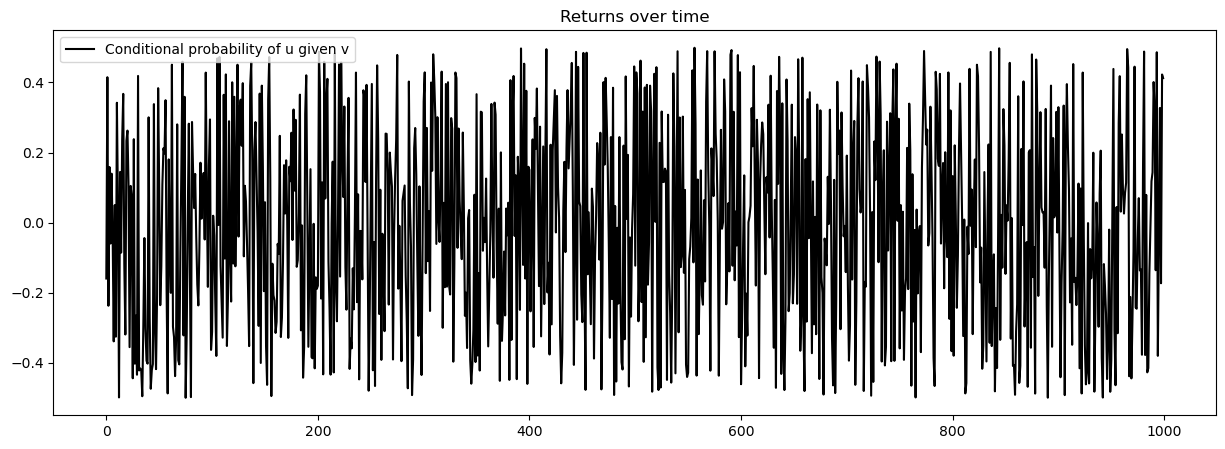

In [44]:
# graphing the returns over time
plt.figure(figsize=(15,5))

# only start after 30 days because that is when the moving averages "start"
plt.title("Returns over time")
plt.plot(MI, color='black')

plt.legend(['Conditional probability of u given v', 'Conditional probability of v given u'])
plt.show()